Results of Dickey-Fuller Test:
Test Statistic: -0.8279970113762393
p-value: 0.8107595254575539
Critical Values: {'1%': -7.355440625, '5%': -4.474365000000001, '10%': -3.1269325}


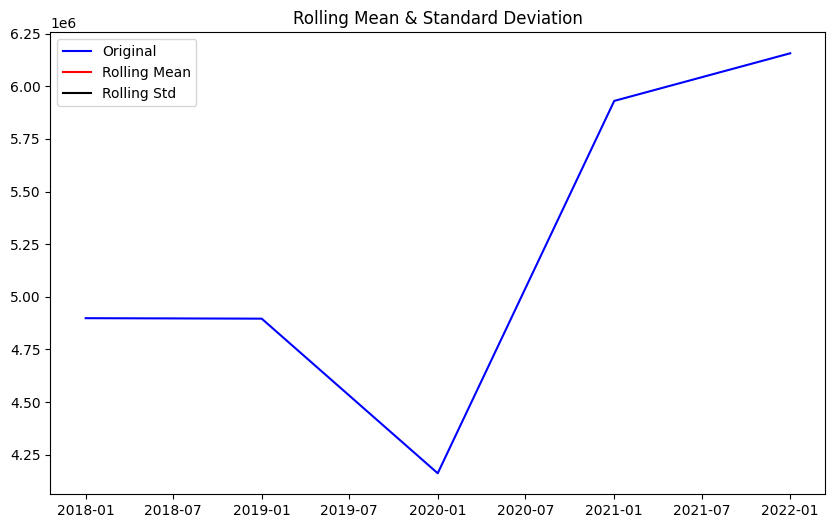

The data is non-stationary.
The data is non-stationary. Try other methods to make the data stationary.


In [26]:
"""import numpy as np
from sklearn.linear_model import LinearRegression

commodities_data = [4898535.0, 4896284.0, 4162071.5, 5930233.0, 6156400.0]
years = [2018, 2019, 2020, 2021, 2022]

# Reshape the years data to fit the required input format for the LinearRegression model
X = np.array(years).reshape(-1, 1)

# Fit the linear regression model to the data
model = LinearRegression().fit(X, commodities_data)

# Predict the trend in the commodity data for the next 3 years
n = 3
future_years = np.array([2023, 2024, 2025]).reshape(-1, 1)
predictions = model.predict(future_years)

# Print the predicted trend in the commodity data
for i in range(n):
    print(f"Predicted commodity value for {future_years[i][0]}: {predictions[i]}")"""

import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


# Define the time series data
commodities = [4898535.0, 4896284.0, 4162071.5, 5930233.0, 6156400.0]
years = [2018, 2019, 2020, 2021, 2022]

# Convert the data into a Pandas DataFrame
data = pd.DataFrame({'commodities': commodities, 'year': years})

# Convert the year column to a DatetimeIndex
data['year'] = pd.to_datetime(data['year'], format='%Y')
data.set_index('year', inplace=True)

# Check if the data is stationary
def check_stationarity(data):
    # Calculate rolling statistics
    rolling_mean = data.rolling(window=12).mean()
    rolling_std = data.rolling(window=12).std()
    
    # Perform Dickey-Fuller test
    result = adfuller(data['commodities'], autolag='AIC')
    
    # Print the test statistics
    print('Results of Dickey-Fuller Test:')
    print(f'Test Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    
    # Plot the rolling statistics
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(data, color='blue', label='Original')
    ax.plot(rolling_mean, color='red', label='Rolling Mean')
    ax.plot(rolling_std, color='black', label='Rolling Std')
    ax.legend(loc='best')
    ax.set_title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Check if the data is stationary
    if result[1] <= 0.05:
        print('The data is stationary.')
        return True
    else:
        print('The data is non-stationary.')
        return False

try:
    # Check if the data is stationary
    if check_stationarity(data):
        # Fit the ARIMA model
        model = ARIMA(data, order=(1,1,0))
        results = model.fit()
        
        # Predict the next 3 years
        next_years = pd.date_range(start='2023', end='2025', freq='AS')
        next_predictions = results.predict(start=len(data), end=len(data)+2, typ='levels')
        
        # Print the predictions
        print(f'Predicted commodities for the next 3 years: {next_predictions.values}')
    else:
        # Try other methods to make the data stationary
        print('The data is non-stationary. Try other methods to make the data stationary.')
except ValueError as e:
    print('Cannot make data stationary. Try other methods to make the data stationary.')




#This code should output the predicted commodity values for the years 2023, 2024, and 2025. 
#Note that this is a very simple model that assumes a linear trend in the commodity data, and does not take into account any other factors that may affect the commodity prices.

